# Giảm chiều dữ liệu

Tập tin ‘Breast Cancer WI.csv’ chứa dữ liệu phân lớp những bệnh nhân ung thư.

2.1 Vẽ biểu đồ phân tích phương sai tích lũy theo sự biến thiên của số chiều k. Dựa vào biểu đồ, chọn một giá trị cho k để giảm chiều, với k > 2. Cho biết lý do đã chọn giá trị cho số chiều k.

2.2 Chọn giá trị k nhỏ nhất để phương sai tích lũy đạt tối thiểu là 99.98%.

2.3 Trực quan hóa dữ liệu với số chiều k = 2.

2.4 Nhận xét kết quả phân lớp với k=2. Có cách nào cải thiện được kết quả phân lớp với k=2?


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%pwd
%ls
%cd 
%ls

In [25]:
import os
path = "/content/drive/My Drive/bai_thi_lds3/LDS3. De thi cuoi khoa K274/"
folder = "Data/"
os.chdir(path)
files = os.listdir(folder)
print(files)

['Duong_huyet_SAU.txt', 'Duong_huyet_TRUOC.txt', 'Samples.txt', 'Breast Cancer WI.csv', 'IQ6.xls']


In [26]:
#Import các thư viện cần thiết
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import scale
import scipy
from sklearn.decomposition import PCA

[ 98.2  99.8 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100. ]


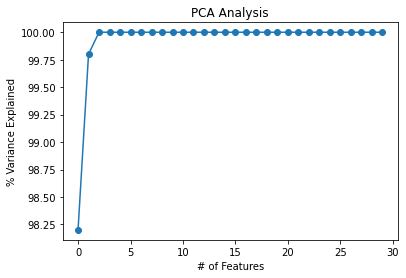

In [27]:
### Cau 2 - GIAM CHIEU DU LIEU ###
data_1 = pd.read_csv(folder+files[3])
x = data_1[data_1.columns[:30]].values
covar_matrix = PCA(n_components = len(data_1.columns)-1)
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var, marker="o")
print(var)

Với bộ dữ liệu có được, có quá nhiều thuộc tính để giải thích cho biến phụ thuộc, hay nói cách khác, có quá nhiều thông tin để nhận định một bệnh nhân có bị ung thư hay không. Việc này dẫn đến vấn đề trì trệ trong khi đưa ra dự đoán, hoặc có thể mắc sai lầm nếu như có những thông tin không quan trọng làm nhiễu. 

Vì vậy, để việc đưa ra quyết định được thuận lợi hơn, bộ dữ liệu cần được giảm chiều. Phương pháp PCA (Principal Component Analys - Phân tích nhân tố chính) là một trong những cách phổ biến nhất được ứng dụng.

Dựa vào đồ thị, chúng ta có thể chọn k trong khoảng [3,4]. Vì lúc ấy, khả năng giải thích đã đạt lớn hơn 90%, và số chiều đã giảm được rất nhiều. Tức là trong 30 thuộc tính trong bộ dữ liệu, PCA đề xuất chỉ cần 3 thông tin quan trọng nhất là đã có thể kết luận bệnh với độ chính xác cao.

In [28]:
k = 1
for i in var:
  print("Tich luy o ",k, "chieu la: ", i )
  k +=1

Tich luy o  1 chieu la:  98.2
Tich luy o  2 chieu la:  99.8
Tich luy o  3 chieu la:  100.0
Tich luy o  4 chieu la:  100.0
Tich luy o  5 chieu la:  100.0
Tich luy o  6 chieu la:  100.0
Tich luy o  7 chieu la:  100.0
Tich luy o  8 chieu la:  100.0
Tich luy o  9 chieu la:  100.0
Tich luy o  10 chieu la:  100.0
Tich luy o  11 chieu la:  100.0
Tich luy o  12 chieu la:  100.0
Tich luy o  13 chieu la:  100.0
Tich luy o  14 chieu la:  100.0
Tich luy o  15 chieu la:  100.0
Tich luy o  16 chieu la:  100.0
Tich luy o  17 chieu la:  100.0
Tich luy o  18 chieu la:  100.0
Tich luy o  19 chieu la:  100.0
Tich luy o  20 chieu la:  100.0
Tich luy o  21 chieu la:  100.0
Tich luy o  22 chieu la:  100.0
Tich luy o  23 chieu la:  100.0
Tich luy o  24 chieu la:  100.0
Tich luy o  25 chieu la:  100.0
Tich luy o  26 chieu la:  100.0
Tich luy o  27 chieu la:  100.0
Tich luy o  28 chieu la:  100.0
Tich luy o  29 chieu la:  100.0
Tich luy o  30 chieu la:  100.0


In [29]:
#Chon k de tich luy dat toi thieu la 99.98%
threshold = .9998
percent   = threshold * 100

pca = PCA(threshold)
pca.fit_transform(x) 

k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('   * Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %d' %k, '--> %.2f%%' %var, '\n')

   * Muốn phương sai tích lũy >= 99.98% thì k >= 4 --> 99.99% 



Phương sai tích luỹ nói lên khả năng giải thích theo PCA với số biến nhất định. Ở đây, với bốn thuộc tính quan trọng nhất, khả năng giải thích sẽ lên đến 99,99%.

<Figure size 576x576 with 0 Axes>

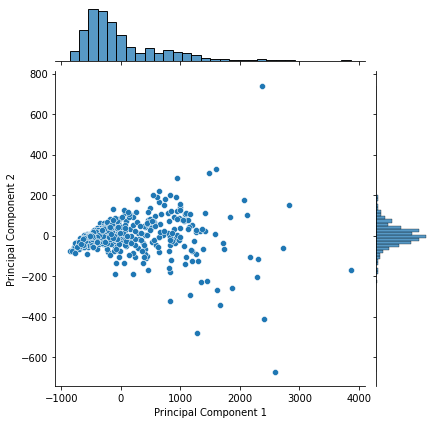

In [30]:
## Biểu diễn trực quan dữ liệu với k = 2
k   = 2
pca = PCA(k)
pca.fit(x)

## Gán tên cho các Principal Components
PC_name = ['Principal Component 1', 'Principal Component 2']

## Chiếu dữ liệu vào không gian mới (Transform data)
B           = pca.transform(x)
principalDf = pd.DataFrame(data = B, columns = PC_name)

## Biểu diễn trực quan dữ liệu (KHÔNG phân lớp)
import seaborn           as sns
plt.figure(figsize = (8, 8))
sns.jointplot(x = PC_name[0], y = PC_name[1], data = principalDf)              
plt.show()



* Ma trận B_T (có thêm biến phân lớp Class)
   Principal Component 1  Principal Component 2      Class
0            1160.142574            -293.917544  Malignant
1            1269.122443              15.630182  Malignant
2             995.793889              39.156743  Malignant
3            -407.180803             -67.380320  Malignant
4             930.341180             189.340742  Malignant 



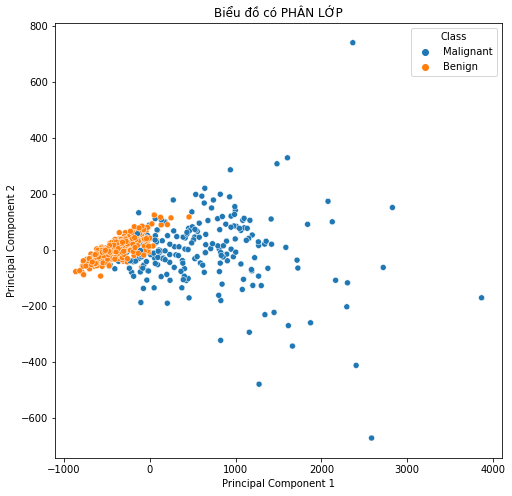

In [31]:
## Lấy cột phân lớp (Class) trong file dữ liệu
y = np.array(data_1.Class)
y = pd.DataFrame(data = y, columns = ["Class"])

## Ghép cột phân lớp (Class) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print('\n* Ma trận B_T (có thêm biến phân lớp Class)')
print(finalDf.head(), '\n')

## Biểu diễn trực quan dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf, hue = "Class", legend = 'full')              
plt.show()

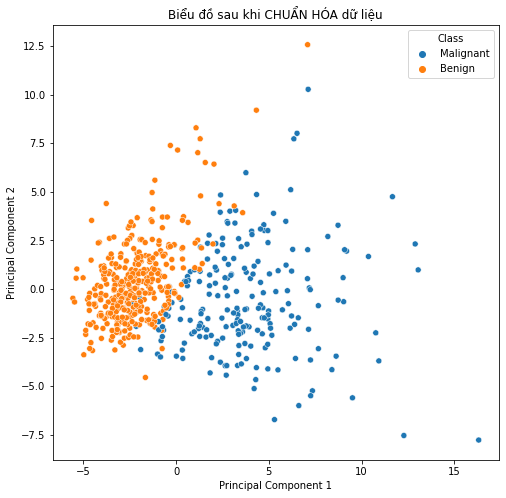

In [32]:
pca_norm  = PCA(k)

## Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
data_norm = StandardScaler().fit_transform(x)

## Áp dụng PCS
pca_norm.fit(data_norm)

## Transform data
B_norm           = pca_norm.transform(data_norm)
principalDf_norm = pd.DataFrame(data = B_norm, columns = PC_name)

## Lấy cột phân lớp (Class) trong file dữ liệu
y = np.array(data_1.Class)
y = pd.DataFrame(data = y, columns = ["Class"])

## Ghép cột phân lớp (Class) vào ma trận PCA
finalDf_norm = pd.concat([principalDf_norm, y], axis = 1)

## Biểu diễn trực quan dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ sau khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf_norm, hue = "Class", legend = 'full')
plt.show()